In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as ex
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv


# 1. Data Preprocessing & Exploration:

In [2]:
import pandas as pd

# Loading the dataset
df = pd.read_csv("/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv")

# Checking the first few rows of the dataset
df.head()


,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [3]:
# Checking for missing values
print("Missing values:", df.isnull().sum())

Missing values: Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64


In [4]:
# Displaying the basic info about the dataset (data types and non-null counts)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [5]:
# Checking the summary statistics for numerical columns
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [6]:
# Checking for duplicates
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


In [7]:
# Checking the unique values for each column
df.nunique()

Unnamed: 0         30
YearsExperience    28
Salary             30
dtype: int64

# 2. Visualizing the Dataset:

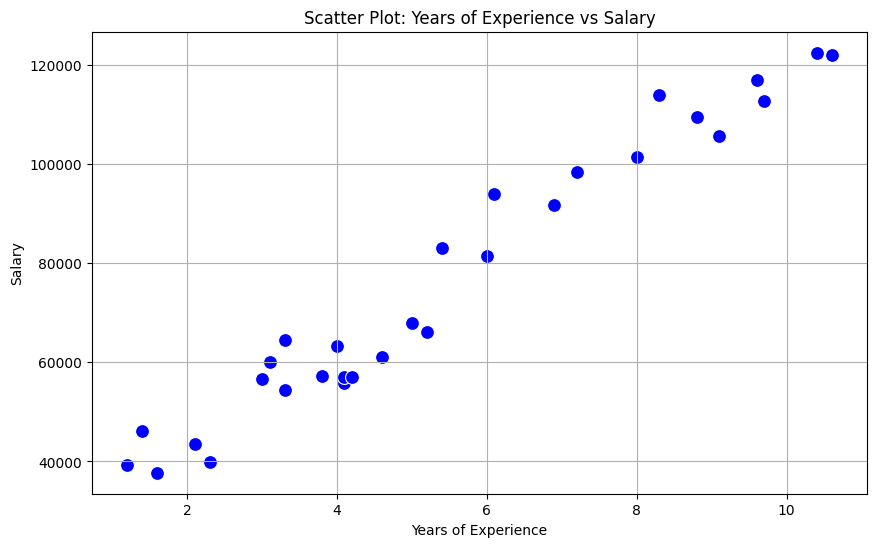

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a scatter plot to visualize the relationship between YearsExperience and Salary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearsExperience', y='Salary', data=df, color='b', s=100)
plt.title('Scatter Plot: Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()


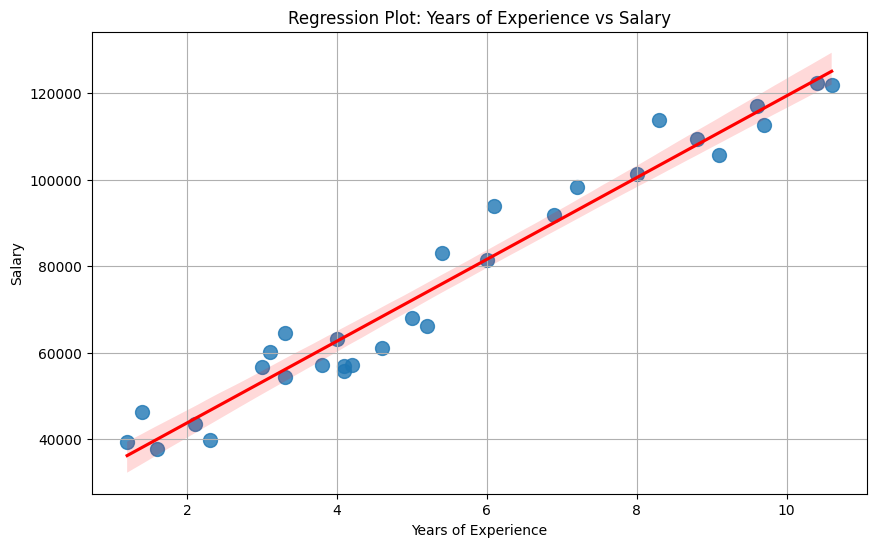

In [9]:
# Visualizing the linear relationship using seaborn's regplot
plt.figure(figsize=(10, 6))
sns.regplot(x='YearsExperience', y='Salary', data=df, scatter_kws={'s': 100}, line_kws={'color': 'red'})
plt.title('Regression Plot: Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()


# 3. Modeling:

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Defining features and target variable
X = df[['YearsExperience']]
y = df['Salary']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## X_train contains the X columns(YearsExperience) in the rows selected for training the model
## Y_train contains the Y columns(Salary) in the rows selected for training model..

# Creating and training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluating the model performance
train_mse = mean_squared_error(y_train, y_train_pred) ## how accurate our predictions are based on the given values with rmse and r2score formulae
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Printing the results
print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R²: {train_r2}")
print(f"Testing R²: {test_r2}")


Training MSE: 27102249.73126133
Testing MSE: 49830096.855908394
Training R²: 0.9645401573418148
Testing R²: 0.9024461774180497


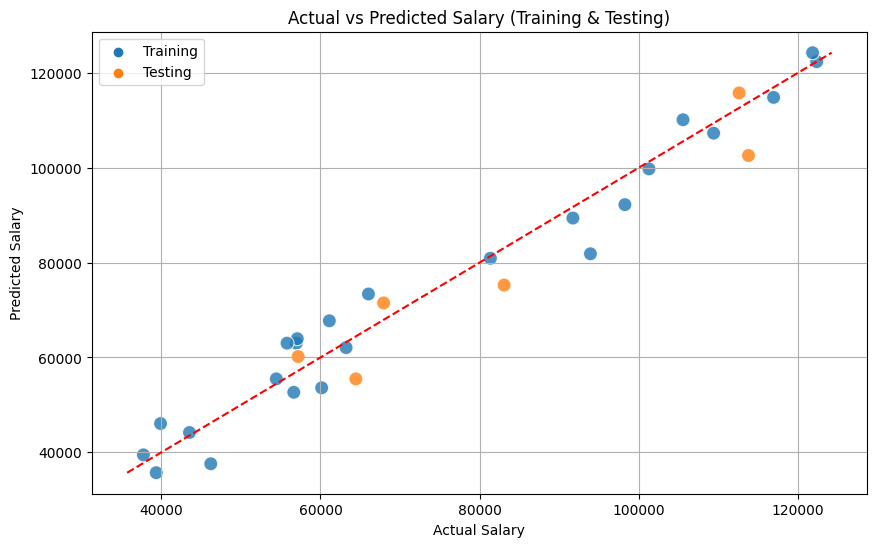

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a DataFrame for actual vs predicted values
train_results = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred, 'Dataset': 'Training'})
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred, 'Dataset': 'Testing'})
combined_results = pd.concat([train_results, test_results])

# Plotting the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', hue='Dataset', data=combined_results, s=100, alpha=0.8)
plt.plot([min(y.min(), y_train_pred.min()) - 1, max(y.max(), y_train_pred.max()) + 1],
         [min(y.min(), y_train_pred.min()) - 1, max(y.max(), y_train_pred.max()) + 1], 'r--')

plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary (Training & Testing)')
plt.grid(True)
plt.legend()
plt.show()


# 4. Model Evaluation Metrics:

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE) and R² Score
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Mean Squared Error (MSE): 49830096.855908394
R² Score: 0.9024461774180497


# 5. Cross-Validation:

In [13]:
from sklearn.model_selection import cross_val_score

# Performing 5-fold cross-validation on the linear regression model
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Printing cross-validation scores and the mean score
print("Cross-validation MSE scores:", -cv_scores)
print("Mean cross-validation MSE:", -cv_scores.mean())


Cross-validation MSE scores: [25905138.76967999 30974669.99857576 59780662.11837504 68417038.21806633
 35766738.23965802]
Mean cross-validation MSE: 44168849.46887103


# 6. Polynomial Regression (for a non-linear trend):

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Creating polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Creating and fitting the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Making predictions
y_poly_pred = poly_model.predict(X_poly)

# Plotting the polynomial regression curve
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearsExperience', y='Salary', data=df, color='blue', s=100)
plt.plot(df['YearsExperience'], y_poly_pred, color='red', linewidth=2)
plt.title('Polynomial Regression: YearsExperience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()


# 7. Feature Engineering (Interaction Terms, Log Transformation):

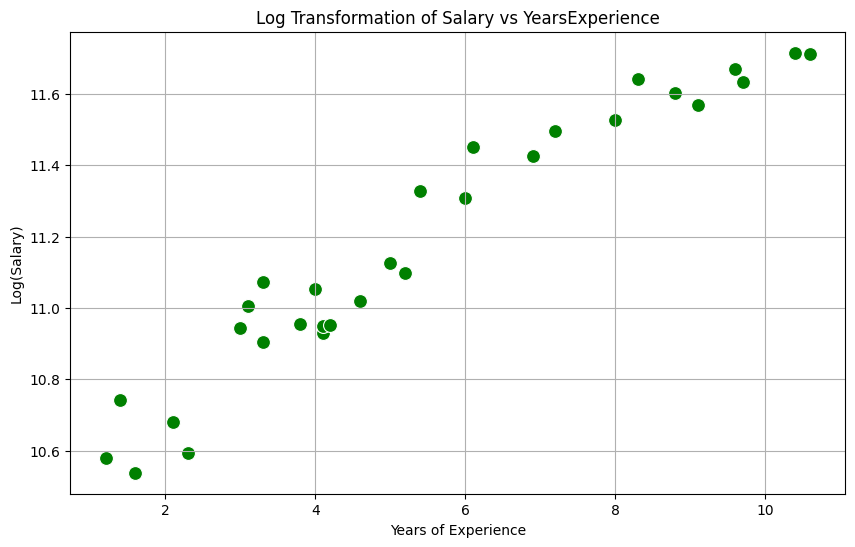

In [14]:
# Applying log transformation to the 'Salary' column
df['LogSalary'] = np.log(df['Salary'])

# Visualizing the transformed data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearsExperience', y='LogSalary', data=df, color='green', s=100)
plt.title('Log Transformation of Salary vs YearsExperience')
plt.xlabel('Years of Experience')
plt.ylabel('Log(Salary)')
plt.grid(True)
plt.show()
